<a href="https://colab.research.google.com/github/Pio2022/dados/blob/main/Ubiratan_Piovezan_8_Chatbot_target_tema_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Objetivo: Treinar 3 modelos iniciais (SGDClassifier, RandomForestClassifier e LogisticRegression) sem otimizações para observar as performances de cada um.
---


**1- Descrição do problema ou tarefa:**

Prever a categorias frutas, animais e graos a partir das perguntas.

**2- Descrição da solução de IA:**
Treinamento supervisionado de modelo de classificação as categorias das perguntas (3 classes) com os dados das 16000 perguntas sobre os temas Frutas, animais e graos 

**3- Fonte de dados:**


Livro de perguntas e respostas da Embrapa
https://mais500p500r.sct.embrapa.br/view/index.php4

**4-Variáveis independentes:** 
perguntas

**5-Variável dependente:** 
Categorias frutas, animais e graos


-----------------------------------------------------------------
Autor do caderno: Wellington Rangel
Data: 23/11/2021

Link para apresentação do projeto

https://drive.google.com/drive/folders/14HOUZdEMHY1PufLGk5-Z5AwOsSgCwsid?usp=sharing

Link para o código completo

https://github.com/wellrangel/assistentevirtualagro

In [6]:
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd /content/drive/MyDrive/Colab Notebooks/curso_embrapa/dados_naoestruturados

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/curso_embrapa/dados_naoestruturados'
/content/drive/MyDrive/Classroom/Curso: Introdução a Modelagem Preditiva com Python


In [9]:
%cd /content/drive/MyDrive/Classroom/'Curso: Introdução a Modelagem Preditiva com Python'/

/content/drive/MyDrive/Classroom/Curso: Introdução a Modelagem Preditiva com Python


In [12]:
# Carrega os dados
df = pd.read_csv('Ubiratan Piovezan - 500perguntas.csv',  sep=',', low_memory=False,encoding='latin-1' )



In [ ]:
df.head()

,Numero,Livro,Capitulo,Pergunta,Resposta,Target,Target_final,Target_final1,Target_final2,Target_final3
0,1,Pera,Generalidades,Qual é o centro de origem da pereira?,São citados três centros de origem da pereira:...,Pera,Frutas,NaN,Frutas,NaN
1,2,Pera,Generalidades,Qual é o centro de origem mais importante?,O centro do Oriente Médio é considerado de imp...,Pera,Frutas,NaN,Frutas,NaN
2,3,Pera,Generalidades,Como ocorreu a disseminação da pereira pelo mu...,"Com base em estudos bioquímicos, verificou-se ...",Pera,Frutas,NaN,Frutas,NaN
3,4,Pera,Generalidades,Quais são as espécies de pereira mais cultivad...,"Na Europa, na América do Norte, na América do ...",Pera,Frutas,NaN,Frutas,NaN
4,5,Pera,Generalidades,Quando a pereira foi introduzida no Brasil?,Não há relatos na literatura sobre a introduçã...,Pera,Frutas,NaN,Frutas,NaN


In [13]:
#selecionando a pergunta e a classe
sub = df[['Pergunta', 'Target_final']]

In [14]:
#renomeando as colunas
sub.columns = ['texto', 'classe']

In [15]:
# apagando linhas com na
sub = sub.dropna()

In [16]:
#mostrando as 10 primeiras linhas
sub[:10]

,texto,classe
0,Qual é o centro de origem da pereira?,Frutas
1,Qual é o centro de origem mais importante?,Frutas
2,Como ocorreu a disseminação da pereira pelo mu...,Frutas
3,Quais são as espécies de pereira mais cultivad...,Frutas
4,Quando a pereira foi introduzida no Brasil?,Frutas
5,Como foi a evolução da cultura no Brasil?,Frutas
6,Qual é a região brasileira mais indicada para ...,Frutas
7,Onde é produzida pera de qualidade no Brasil?,Frutas
8,Quais são os principais tipos de pera produzid...,Frutas
9,Qual é a época de produção de pera no Sul do B...,Frutas


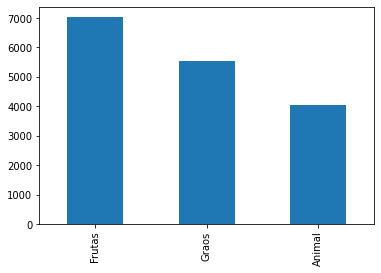

In [17]:
# Mostra balanceamento das classes (gráfico de barras )
sub.classe.value_counts().plot(kind='bar')

In [18]:
# Separa os dados de treino e teste (proporção 80/20, stratify para classes desbalanceadas)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sub.texto, sub.classe, test_size=0.2, 
                                                    stratify=sub.classe,random_state=42)

In [19]:
# Mostra um exemplo do texto.
X_train[0]

'Qual é o centro de origem da pereira?'

In [20]:
# Confere a proporção das classes nos dados de treino e de teste
print('TREINO : ',y_train.shape,'\n', y_train.value_counts(normalize=True),'\n')
print('TESTE  : ',y_test.shape,'\n', y_test.value_counts(normalize=True))

TREINO :  (13276,) 
 Frutas    0.423923
Graos     0.333308
Animal    0.242769
Name: classe, dtype: float64 

TESTE  :  (3320,) 
 Frutas    0.423795
Graos     0.333434
Animal    0.242771
Name: classe, dtype: float64


## Treinando o classificador *RandomForestClassifier*

In [21]:
# Define o pipeline incluindo: tokenização (tfidf_vectorizer) e treinamento do classificador
pipelineRF = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier()), 
])
#n_estimators=50,max_features=2,min_samples_leaf=1

In [22]:
%%time
# Treine o modelo(fit) 
classificadorRF = pipelineRF.fit(X_train, y_train)

CPU times: user 12.8 s, sys: 7.83 ms, total: 12.8 s
Wall time: 12.9 s


In [23]:
# Mostra a acurácia do modelo nos dados de teste 
classificadorRF.score(X_test,y_test)

0.8355421686746988

In [24]:
# Faça a predição nos dados de teste
predictedRF = classificadorRF.predict(X_test)

In [25]:
# Mostra o f1 score do modelo nos dados de teste (métrica usada quando as classes estão desbalanceadas)
from sklearn.metrics import f1_score
f1_score(y_test, predictedRF, average='weighted') 

0.8345762521858849

In [26]:
# avalie o modelo usando 'classification_report' do sklearn
from sklearn import metrics
print(metrics.classification_report(y_test, predictedRF))

              precision    recall  f1-score   support

      Animal       0.94      0.77      0.84       806
      Frutas       0.76      0.95      0.84      1407
       Graos       0.91      0.74      0.81      1107

    accuracy                           0.84      3320
   macro avg       0.87      0.82      0.83      3320
weighted avg       0.85      0.84      0.83      3320



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


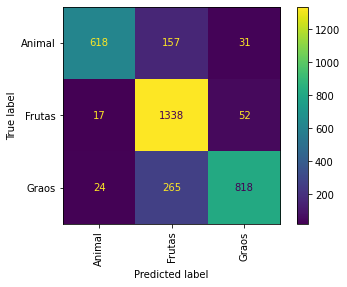

In [27]:
# mostrar a matrix de confusão do modelo sobre todo o dataset
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificadorRF, X_test, y_test.values.ravel(), values_format='d', xticks_rotation = 'vertical')


## Treinando o classificador *LogisticRegression*




In [28]:
# Define o pipeline incluindo: tokenização (tfidf_vectorizer) e treinamento do classificador
pipelineLR = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression()), # default hinge. To get probabilities, use loss='log' or 'modified_huber'
])


In [29]:
%%time
# Treine o modelo(fit) 
classificadorLR = pipelineLR.fit(X_train, y_train)

CPU times: user 2 s, sys: 1.42 s, total: 3.42 s
Wall time: 1.91 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [30]:
# Mostra a acurácia do modelo nos dados de teste 
classificadorLR.score(X_test,y_test)

0.8873493975903615

In [31]:
 # Faça a predição nos dados de teste
 predictedLR = classificadorLR.predict(X_test)

In [32]:
# Mostra o f1 score do modelo nos dados de teste (métrica usada quando as classes estão desbalanceadas)
from sklearn.metrics import f1_score
f1_score(y_test, predictedLR, average='weighted') 

0.8869545257534525

In [33]:
# avalie o modelo usando 'classification_report' do sklearn
from sklearn import metrics
print(metrics.classification_report(y_test, predictedLR))

              precision    recall  f1-score   support

      Animal       0.95      0.89      0.92       806
      Frutas       0.85      0.94      0.89      1407
       Graos       0.90      0.82      0.86      1107

    accuracy                           0.89      3320
   macro avg       0.90      0.88      0.89      3320
weighted avg       0.89      0.89      0.89      3320



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


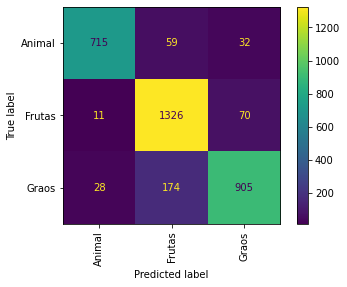

In [34]:
# mostrar a matrix de confusão do modelo sobre todo o dataset
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificadorLR, X_test, y_test.values.ravel(), values_format='d', xticks_rotation = 'vertical')


## Treinando o classificador *SGDClassifier*


In [35]:
# Define o pipeline incluindo: tokenização (tfidf_vectorizer) e treinamento do classificador
pipelineSDG = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=50000,ngram_range=(1,2))),
    ('clf', SGDClassifier()), # default hinge. To get probabilities, use loss='log' or 'modified_huber'
])
#loss='log', penalty='elasticnet', alpha=1e-06

In [36]:
%%time
# Treine o modelo(fit) 
classificadorSGD = pipelineSDG.fit(X_train, y_train)

CPU times: user 761 ms, sys: 145 ms, total: 906 ms
Wall time: 766 ms


In [37]:
# Mostra a acurácia do modelo nos dados de teste 
classificadorSGD.score(X_test,y_test)

0.8951807228915662

In [38]:
 # Faça a predição nos dados de teste
 predictedSGD = classificadorSGD.predict(X_test)

In [39]:
# Mostra o f1 score do modelo nos dados de teste (métrica usada quando as classes estão desbalanceadas)
from sklearn.metrics import f1_score
f1_score(y_test, predictedSGD, average='weighted') 

0.8947098182389498

In [40]:
# avalie o modelo usando 'classification_report' do sklearn
from sklearn import metrics
print(metrics.classification_report(y_test, predictedSGD))

              precision    recall  f1-score   support

      Animal       0.94      0.90      0.92       806
      Frutas       0.86      0.95      0.90      1407
       Graos       0.91      0.83      0.87      1107

    accuracy                           0.90      3320
   macro avg       0.90      0.89      0.90      3320
weighted avg       0.90      0.90      0.89      3320



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


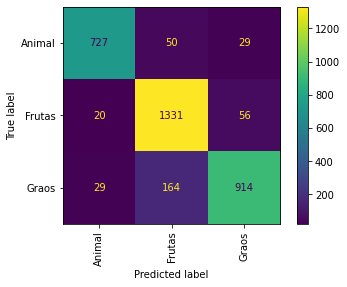

In [41]:
# mostrar a matrix de confusão do modelo sobre todo o dataset
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificadorSGD, X_test, y_test.values.ravel(), values_format='d', xticks_rotation = 'vertical')


Resumo: 

* RandomForest       f1-score = 0.8322626955630255
* LogisticRegression f1-score = 0.8869545257534525
* **SGDClassifier**      f1-score = 0.8947030518929378

